<a href="https://colab.research.google.com/github/smraytech/test/blob/main/Predicting_Housing_Prices_Using_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal:

The goal of this project is to predict house prices using various features from a real-world housing dataset. We will use Gradient Boosting, a powerful ensemble learning method, to improve prediction accuracy. This project will also demonstrate data cleaning, preprocessing, feature engineering, model training, and evaluation.

Problem Statement:

In the housing market, accurately predicting house prices is crucial for buyers, sellers, and real estate companies. Given a dataset of house attributes (size, location, number of rooms, etc.), my task is to predict the market price of a house. This is a regression problem because the target variable, Price, is continuous.

Objectives:

Load and explore the dataset to understand features and missing values.

Preprocess the data by handling missing values and encoding categorical variables.

Perform feature selection and engineering to improve model performance.

Split the data into training and testing sets.

Train a Gradient Boosting Regressor to predict house prices.

Evaluate model performance using metrics like RMSE (Root Mean Squared Error) and R² score.

Visualize feature importance to interpret the model.

https://www.kaggle.com/datasets/shree1992/housedata

Step 1: Import Libraries and Load Dataset

In [1]:
import pandas as pd       # For data handling
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt   # For plotting
import seaborn as sns            # For advanced visualizations

Load the dataset

In [10]:
df = pd.read_csv('/content/Housing data.csv')

Check first few rows

In [11]:
print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

Check basic info (columns, data types, missing values)

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Check descriptive statistics for numerical columns

In [13]:
print(df.describe())

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       

Check missing values per column

In [14]:
print(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


Check number of unique values (to identify categorical features)

In [15]:
print(df.nunique())

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64


Step 2: Data Cleaning and Preprocessing

Handling missing values and preprocessing

In [16]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

Fill missing values
For numerical columns, fill with median

In [17]:
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, fill with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-1492790651.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-1492790651.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

So [0] just grabs the first most frequent value. Without it, fillna() would fail because it expects a single scalar value, not a Series.

Encode categorical variables using one-hot encoding

In [18]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

Verify no missing values remain

In [19]:
print(df.isnull().sum())

price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
                    ..
statezip_WA 98188    0
statezip_WA 98198    0
statezip_WA 98199    0
statezip_WA 98288    0
statezip_WA 98354    0
Length: 4725, dtype: int64


Explanation:

Missing numerical values are replaced with median.

Missing categorical values are replaced with mode.

One-hot encoding converts categorical variables to numerical format suitable for machine learning.

Step 3: Feature Selection and Target Variable

In [21]:
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above',
       ...
       'statezip_WA 98155', 'statezip_WA 98166', 'statezip_WA 98168',
       'statezip_WA 98177', 'statezip_WA 98178', 'statezip_WA 98188',
       'statezip_WA 98198', 'statezip_WA 98199', 'statezip_WA 98288',
       'statezip_WA 98354'],
      dtype='object', length=4725)


In [22]:
# Step 3: Separate features and target variable

# Define target variable
y = df['price']

# Drop target from feature set
X = df.drop('price', axis=1)

# Check shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (4600, 4724)
Target shape: (4600,)


Step 4: Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Split the dataset into training and testing sets
# We'll use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the shapes to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3680, 4724)
X_test shape: (920, 4724)
y_train shape: (3680,)
y_test shape: (920,)


Step 5: Train Gradient Boosting Regressor

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

Initialize the Gradient Boosting Regressor

In [28]:
gbr = GradientBoostingRegressor(
    n_estimators=500,    # Number of boosting rounds (trees)
    learning_rate=0.05,  # Step size shrinkage to prevent overfitting
    max_depth=4,         # Maximum depth of each tree
    random_state=42      # For reproducibility
)

Train the model on training data

In [29]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=500,
                          random_state=42)

Predict on the test set

In [30]:
y_pred = gbr.predict(X_test)

Explanation:

GradientBoostingRegressor builds decision trees sequentially.

Each tree tries to correct the errors of the previous ones.

n_estimators controls how many trees are built.

learning_rate reduces the contribution of each tree to prevent overfitting.

max_depth limits tree complexity.

Step 6: Evaluate the Model

# Calculate RMSE (Root Mean Squared Error)

In [31]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 980682.304753366


Explanation:

RMSE tells how much on average the model's predictions deviate from actual prices.

R² Score indicates how much variance in house prices is explained by the model.

# Calculate R-squared score

In [32]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.05697775728216692


Step 7: Feature Importance Visualization

In [33]:
# Get feature importances from the trained Gradient Boosting model
importances = gbr.feature_importances_
features = X.columns

In [34]:
# Create a DataFrame for visualization
feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

In [35]:
# Sort features by importance in descending order
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

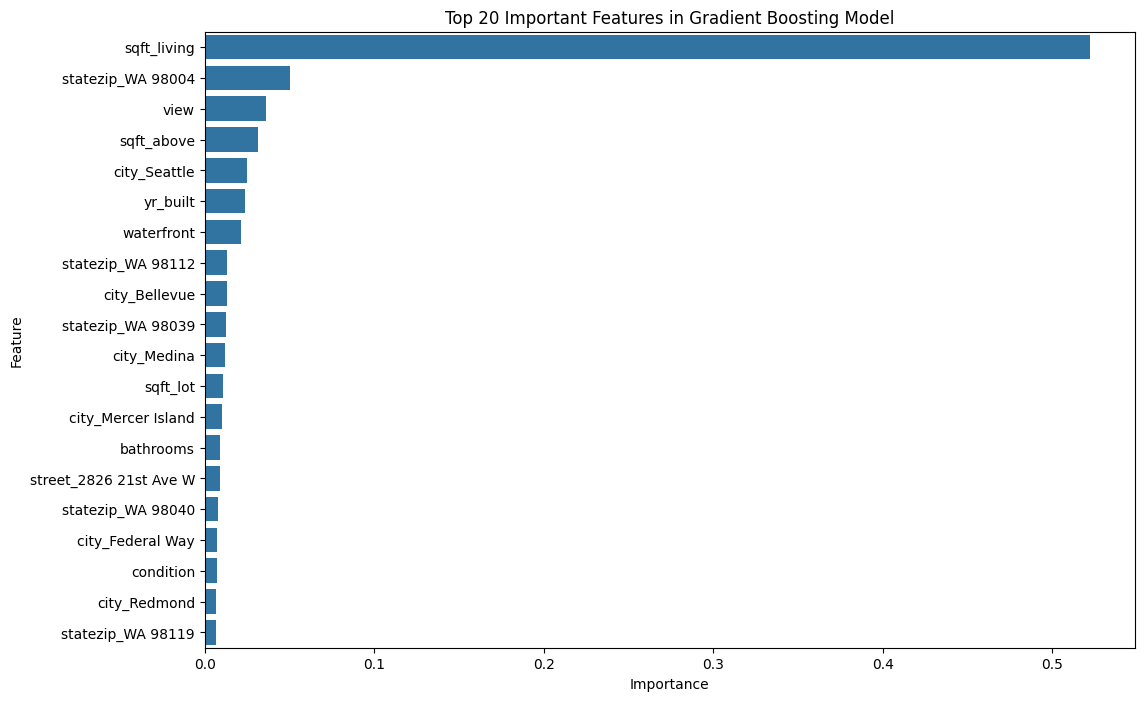

In [36]:
# Plot the top 20 important features
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(20))
plt.title("Top 20 Important Features in Gradient Boosting Model")
plt.show()

Explanation:

feature_importances_ is a property of Gradient Boosting that gives the relative importance of each feature.

We create a DataFrame and sort it to easily visualize the top features.

The bar plot helps us see which features the model relied on most to make predictions.